In [2]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import seaborn as sns
from geopy.distance import geodesic


from utils import *

datasets_folder = './datasets'
starting_date = datetime(2019,1,1)

## ciao


In [3]:
traffic_folder = os.path.join(datasets_folder,'traffic')

readings_df = merge_csv_to_dataframe(os.path.join(traffic_folder, 'readings'), sep=';')
accuracies_df = merge_csv_to_dataframe(os.path.join(traffic_folder, 'accuracies'), sep=';')

display(readings_df.head(3))
display(accuracies_df.head(3))

Merged 6 CSV files
Merged 6 CSV files


,data,codice spira,00:00-01:00,01:00-02:00,02:00-03:00,03:00-04:00,04:00-05:00,05:00-06:00,06:00-07:00,07:00-08:00,...,stato,codimpsem,direzione,angolo,longitudine,latitudine,geopoint,ID_univoco_stazione_spira,giorno settimana,Giorno della settimana
0,2023-12-12,3.17 3.18 6 2,33,23,17,10,26,53,93,292,...,A,401.0,NaN,2.0,11.348231,44.521548,"44.5215481671945, 11.348230662166",532.0,Martedì,NaN
1,2023-12-12,3.17 3.19 2 3,48,18,12,15,42,101,194,592,...,A,401.0,NaN,182.0,11.348157,44.521549,"44.5215485863886, 11.3481566444247",534.0,Martedì,NaN
2,2023-12-12,3.18 0.127 4 1,12,4,3,6,3,26,29,70,...,A,213.0,O,70.0,11.349238,44.525276,"44.5252762330901, 11.3492381515612",535.0,Martedì,NaN


,data,codice spira,00:00-01:00,01:00-02:00,02:00-03:00,03:00-04:00,04:00-05:00,05:00-06:00,06:00-07:00,07:00-08:00,...,14:00-15:00,15:00-16:00,16:00-17:00,17:00-18:00,18:00-19:00,19:00-20:00,20:00-21:00,21:00-22:00,22:00-23:00,23:00-24:00
0,2019-01-14,4.30 4.96 4 1,100%,100%,100%,100%,100%,100%,100%,100%,...,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%
1,2019-01-14,4.31 4.29 6 1,100%,100%,100%,95%,58%,87%,100%,100%,...,83%,91%,100%,100%,91%,79%,95%,87%,95%,100%
2,2019-01-14,4.31 4.39 4 1,100%,100%,100%,100%,66%,83%,100%,100%,...,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%


Let's look for not informative columns

In [4]:
print(readings_df.columns)

Index(['data', 'codice spira', '00:00-01:00', '01:00-02:00', '02:00-03:00',
       '03:00-04:00', '04:00-05:00', '05:00-06:00', '06:00-07:00',
       '07:00-08:00', '08:00-09:00', '09:00-10:00', '10:00-11:00',
       '11:00-12:00', '12:00-13:00', '13:00-14:00', '14:00-15:00',
       '15:00-16:00', '16:00-17:00', '17:00-18:00', '18:00-19:00',
       '19:00-20:00', '20:00-21:00', '21:00-22:00', '22:00-23:00',
       '23:00-24:00', 'id_uni', 'Livello', 'tipologia', 'codice',
       'codice arco', 'codice via', 'Nome via', 'Nodo da', 'Nodo a',
       'ordinanza', 'stato', 'codimpsem', 'direzione', 'angolo', 'longitudine',
       'latitudine', 'geopoint', 'ID_univoco_stazione_spira',
       'giorno settimana', 'Giorno della settimana'],
      dtype='object')


We drop a bunch of them

In [5]:
readings_df = readings_df.drop(columns=[
    'id_uni',
    'Livello',
    'tipologia',
    'codice',
    'codice arco',
    'codice via',
    'Nome via',
    'Nodo da',
    'Nodo a',
    'ordinanza',
    'stato',
    'codimpsem',
    'direzione',
    'angolo',
    'longitudine',
    'latitudine',
    'ID_univoco_stazione_spira',
    'Giorno della settimana',
    'giorno settimana'
])

In [6]:
readings_df = readings_df.dropna()
readings_df

,data,codice spira,00:00-01:00,01:00-02:00,02:00-03:00,03:00-04:00,04:00-05:00,05:00-06:00,06:00-07:00,07:00-08:00,...,15:00-16:00,16:00-17:00,17:00-18:00,18:00-19:00,19:00-20:00,20:00-21:00,21:00-22:00,22:00-23:00,23:00-24:00,geopoint
0,2023-12-12,3.17 3.18 6 2,33,23,17,10,26,53,93,292,...,230,339,373,423,251,143,93,74,105,"44.5215481671945, 11.348230662166"
1,2023-12-12,3.17 3.19 2 3,48,18,12,15,42,101,194,592,...,538,582,696,518,517,372,178,149,146,"44.5215485863886, 11.3481566444247"
2,2023-12-12,3.18 0.127 4 1,12,4,3,6,3,26,29,70,...,106,112,107,60,66,49,28,33,25,"44.5252762330901, 11.3492381515612"
3,2023-12-12,3.18 0.127 6 1,164,90,67,75,135,257,461,1323,...,1273,1464,1478,1058,975,782,452,328,407,"44.5253479507428, 11.3496476741688"
4,2023-12-12,3.18 3.17 2 1,67,27,22,17,56,128,238,661,...,659,726,858,670,646,445,228,174,189,"44.5233146014172, 11.3485696635646"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1788560,2024-12-12,4.36 4.35 2 1,125,34,12,13,21,55,217,708,...,350,740,745,769,763,483,261,171,225,"44.4756352204794, 11.3779772275529"
1788561,2024-12-12,4.36 4.37 6 1,202,56,28,22,20,58,239,897,...,451,1015,995,872,883,724,324,321,409,"44.4752096947446, 11.3786958463985"
1788562,2024-12-12,4.36 4.91 4 1,96,56,22,21,37,98,274,654,...,217,555,611,542,561,395,202,200,215,"44.476834330981, 11.3794001479584"
1788563,2024-12-12,4.37 4.36 2 1,181,48,30,21,22,65,300,923,...,450,938,1006,1112,968,608,337,266,312,"44.4741227481875, 11.3818747370089"


## Accuracies

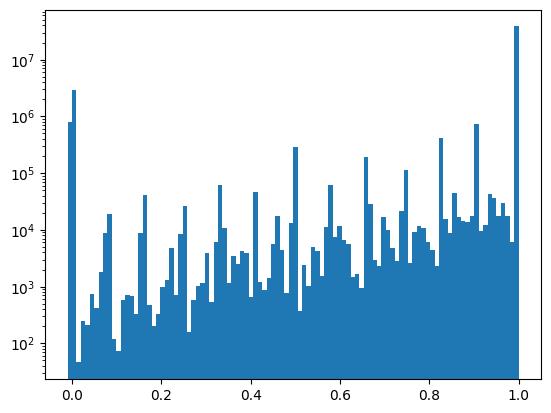

In [7]:
accuracies_df = convert_percentage_to_number(accuracies_df)
v,c=np.unique(np.array(accuracies_df[accuracies_df.columns[2:]]), return_counts=True)
unique_values_array = np.array([v, c]).T
np.set_printoptions(suppress=True)
a=unique_values_array[np.argsort(unique_values_array[:, 0])]
plt.yscale('log')
plt.hist(a[:, 0], bins=len(a[:, 0]), weights=a[:, 1])
plt.show()

oh damn there are -0.01! lets map them to 0

In [8]:
# Define the function to apply
def map_values(x):
    if x == -0.01:
        return 0
    return x

# Apply the function to every item in the dataframe
accuracies_df = accuracies_df.map(map_values)

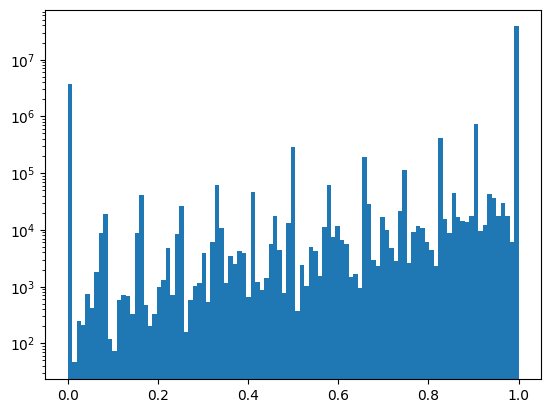

In [9]:
v,c=np.unique(np.array(accuracies_df[accuracies_df.columns[2:]]), return_counts=True)
unique_values_array = np.array([v, c]).T
np.set_printoptions(suppress=True)
a=unique_values_array[np.argsort(unique_values_array[:, 0])]
plt.yscale('log')
plt.hist(a[:, 0], bins=len(a[:, 0]), weights=a[:, 1])
plt.show()


In [10]:
common_cols = readings_df.columns.intersection(accuracies_df.columns).tolist()

accurate_traffic_df = apply_accuracy_df(readings_df[common_cols],accuracies_df[common_cols],max_multiplier=15, half_multiplier=2).reset_index(drop=True)
readings_df = readings_df.reset_index(drop=True)
for col in list(set(readings_df.columns) - set(common_cols)): # add back readings columns
    accurate_traffic_df[col] = readings_df[col]

In [11]:
accurate_traffic_df

,data,codice spira,00:00-01:00,01:00-02:00,02:00-03:00,03:00-04:00,04:00-05:00,05:00-06:00,06:00-07:00,07:00-08:00,...,15:00-16:00,16:00-17:00,17:00-18:00,18:00-19:00,19:00-20:00,20:00-21:00,21:00-22:00,22:00-23:00,23:00-24:00,geopoint
0,2023-12-12,3.17 3.18 6 2,33,23,17,10,26,53,93,292,...,230,339,373,423,251,143,93,74,105,"44.5215481671945, 11.348230662166"
1,2023-12-12,3.17 3.19 2 3,48,18,12,15,42,101,194,592,...,538,582,696,518,517,372,178,149,146,"44.5215485863886, 11.3481566444247"
2,2023-12-12,3.18 0.127 4 1,12,4,3,6,3,26,29,70,...,106,112,107,60,66,49,28,33,25,"44.5252762330901, 11.3492381515612"
3,2023-12-12,3.18 0.127 6 1,164,90,67,75,135,257,461,1323,...,1273,1464,1478,1058,975,782,452,328,407,"44.5253479507428, 11.3496476741688"
4,2023-12-12,3.18 3.17 2 1,67,27,22,17,56,128,238,661,...,659,726,858,670,646,445,228,174,189,"44.5233146014172, 11.3485696635646"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1785118,2024-12-12,4.36 4.35 2 1,125,34,12,13,21,55,217,708,...,714,740,745,769,763,483,261,171,225,"44.4756352204794, 11.3779772275529"
1785119,2024-12-12,4.36 4.37 6 1,202,56,28,22,20,58,239,897,...,920,1015,995,872,883,724,324,321,409,"44.4752096947446, 11.3786958463985"
1785120,2024-12-12,4.36 4.91 4 1,96,56,22,21,37,98,274,654,...,442,555,611,542,561,395,202,200,215,"44.476834330981, 11.3794001479584"
1785121,2024-12-12,4.37 4.36 2 1,181,48,30,21,22,65,300,923,...,789,938,1006,1112,968,608,337,266,312,"44.4741227481875, 11.3818747370089"


## Locality of the readings

In [13]:
giardini_margherita_geopoint = '44.482671138769533,11.35406170088398'
san_felice_geopoint = '44.499059983334519,11.327526717440112'
chiarini_geopoint = '44.499134335170289, 11.285089594971216'

radius = 1 # km

close_df = search_close_readings(accurate_traffic_df, giardini_margherita_geopoint, radius)

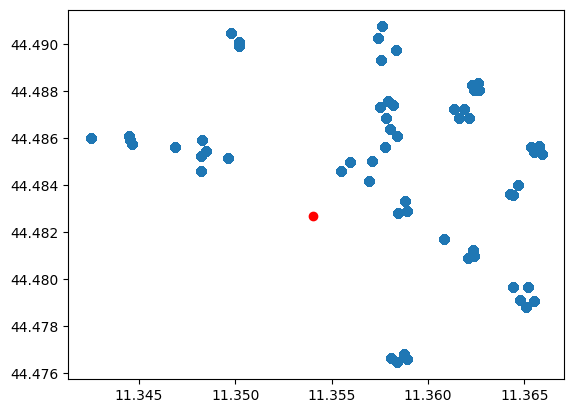

In [14]:
y = close_df['geopoint'].apply(lambda x: float(x.split(',')[0]))
x = close_df['geopoint'].apply(lambda x: float(x.split(',')[1]))
plt.scatter(x, y)
plt.scatter(float(giardini_margherita_geopoint.split(',')[1]), float(giardini_margherita_geopoint.split(',')[0]), c='red')
plt.show()

In [15]:
close_df=close_df.drop(columns=['geopoint', 'codice spira'])

<Axes: xlabel='Hour'>

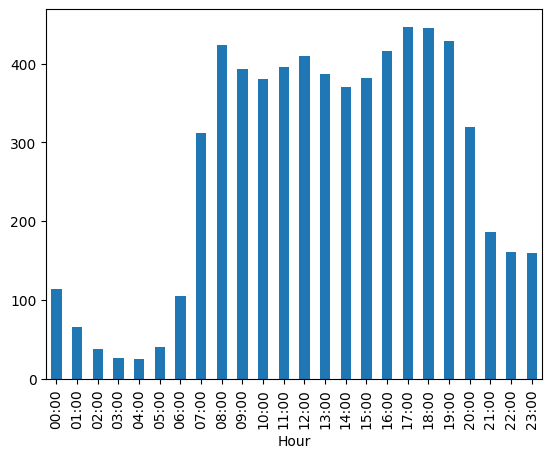

In [42]:
df_melted = close_df.melt(id_vars=["data"], var_name="Hour", value_name="Value")
df_melted['Hour'] = df_melted['Hour'].apply(lambda x: x.split('-')[0])
df_melted.groupby('Hour')['Value'].mean().plot(kind='bar')

In [43]:
df_melted

,data,Hour,Value
0,2023-12-12,00:00,153
1,2023-12-12,00:00,216
2,2023-12-12,00:00,37
3,2023-12-12,00:00,126
4,2023-12-12,00:00,131
...,...,...,...
2972635,2024-12-12,23:00,404
2972636,2024-12-12,23:00,450
2972637,2024-12-12,23:00,122
2972638,2024-12-12,23:00,0


PROBLEMA: in airpollution dataframe abbiamo preso la data di fine rilevazione perche era gia presente e quindi facile da convertire. Qui e un casino perche devi convertire il nome delle colonne a mano e per la colonna 23:00-00:00 dovresti prendere la data di fine ossia 00:00, però non di oggi ma del giorno successivo. Questo e un bordello da fare quindi mi sa che prenderemo la data di inizio in tutti e due e bona che è molto piu easy per il dataset del traffico.

In [44]:
df_melted['data'] = pd.to_datetime(df_melted['data'] + ' ' + df_melted['Hour'])
df_melted = df_melted.rename(columns={'data': 'Date'})
df_melted = df_melted.drop(columns=['Hour'])
df_melted = df_melted.groupby('Date', as_index=False)['Value'].sum()

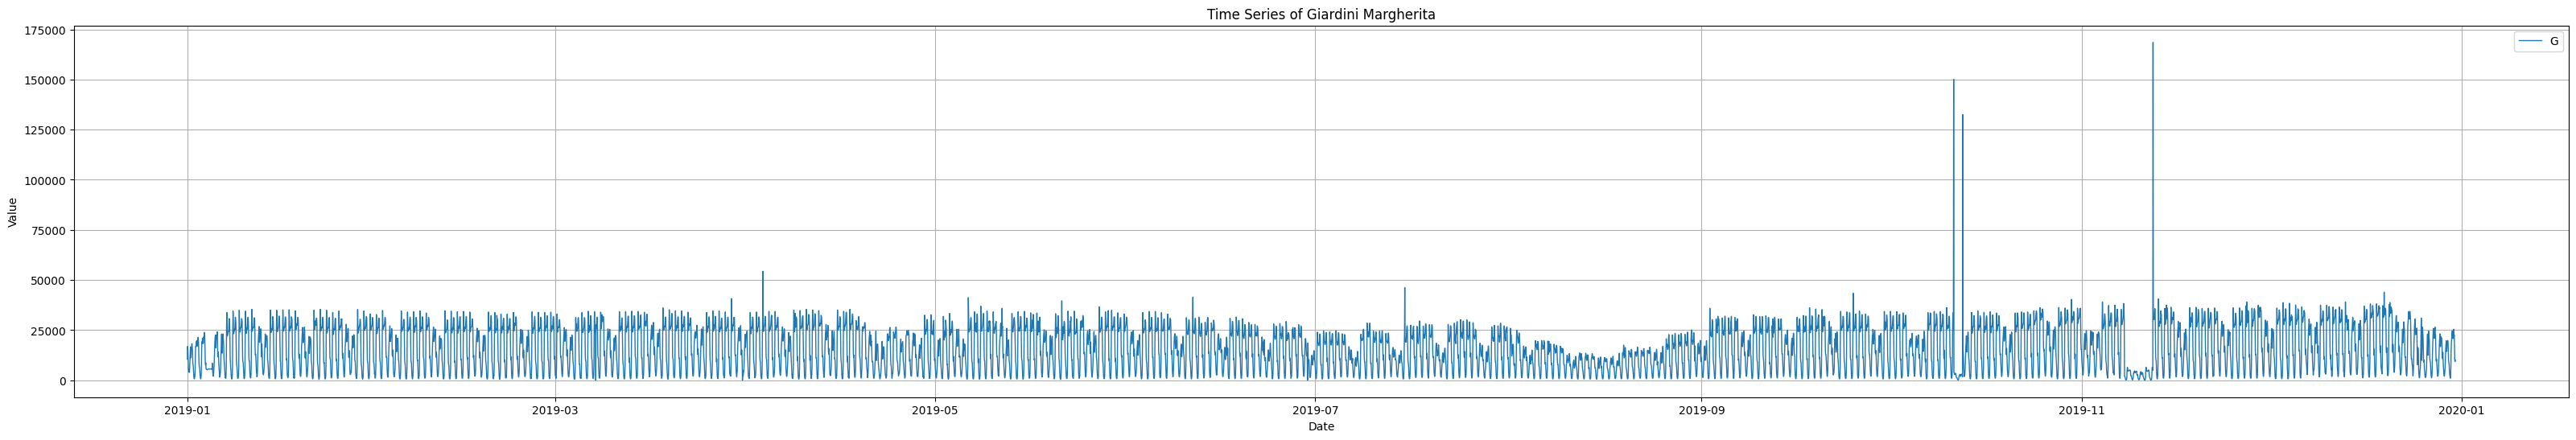

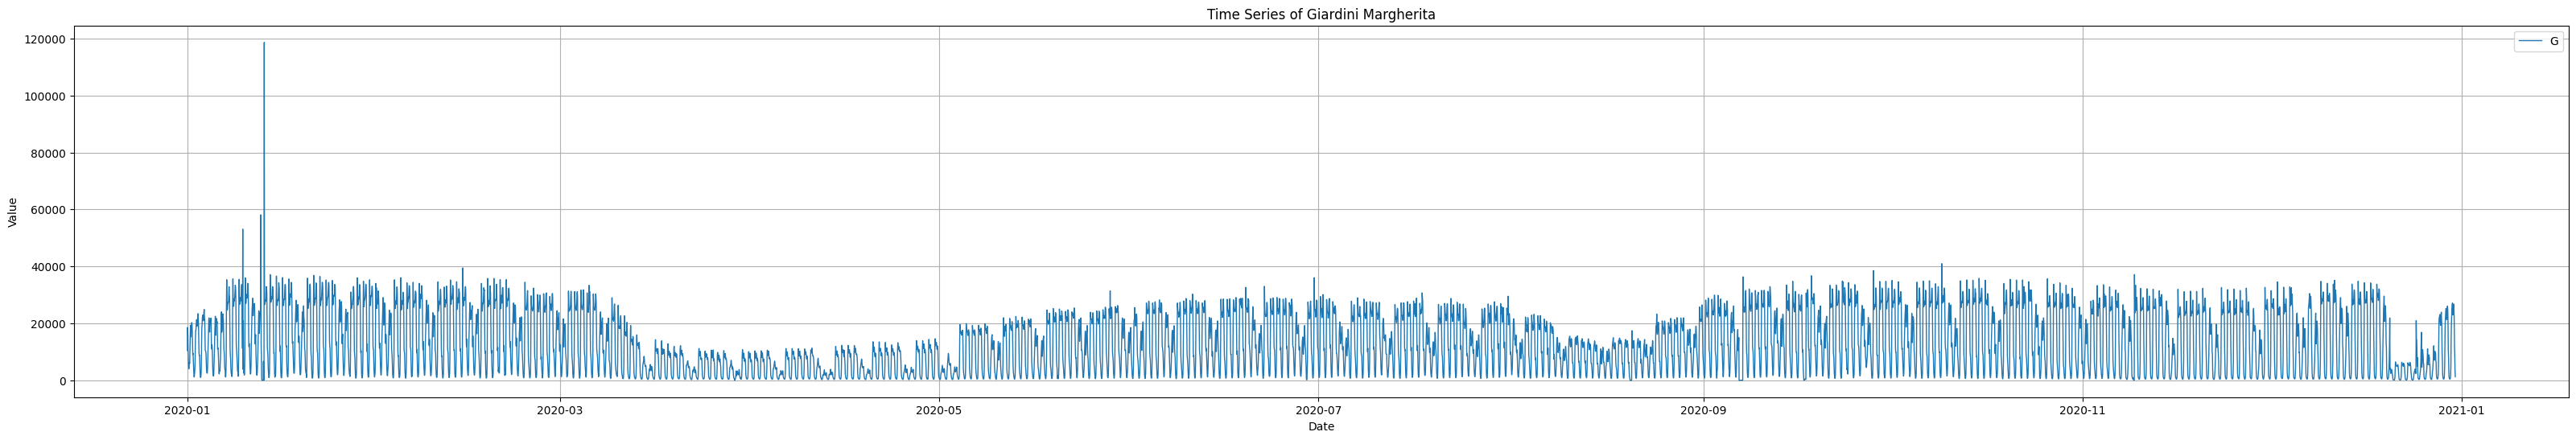

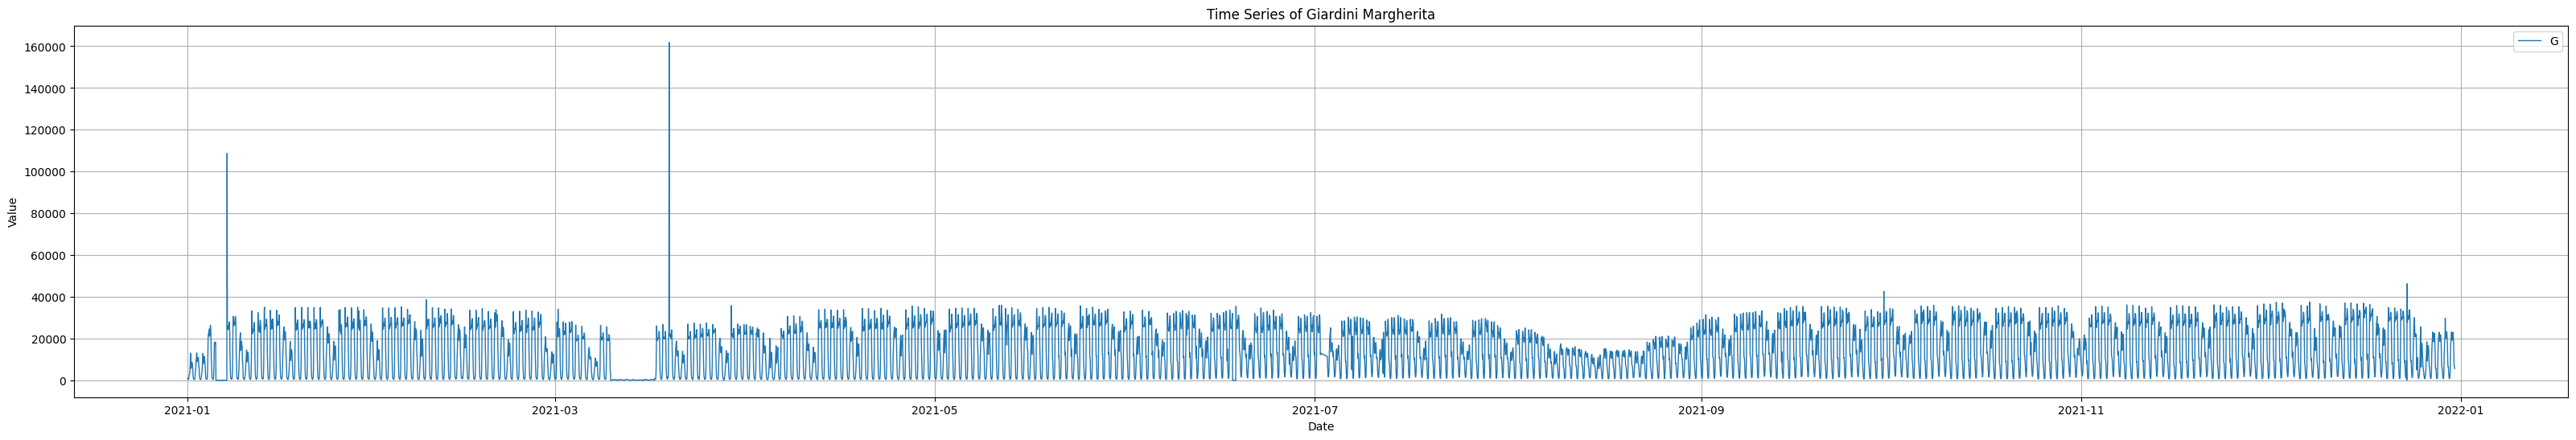

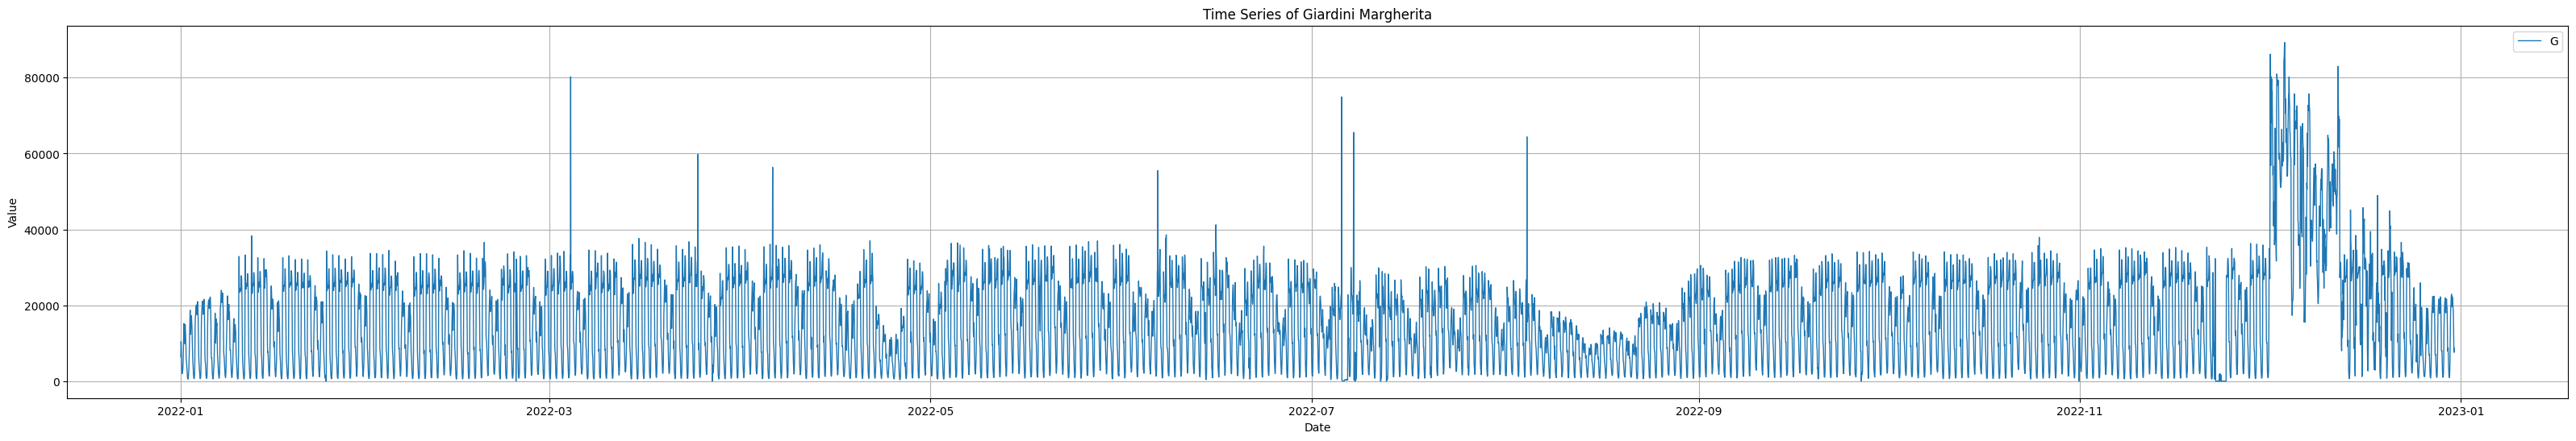

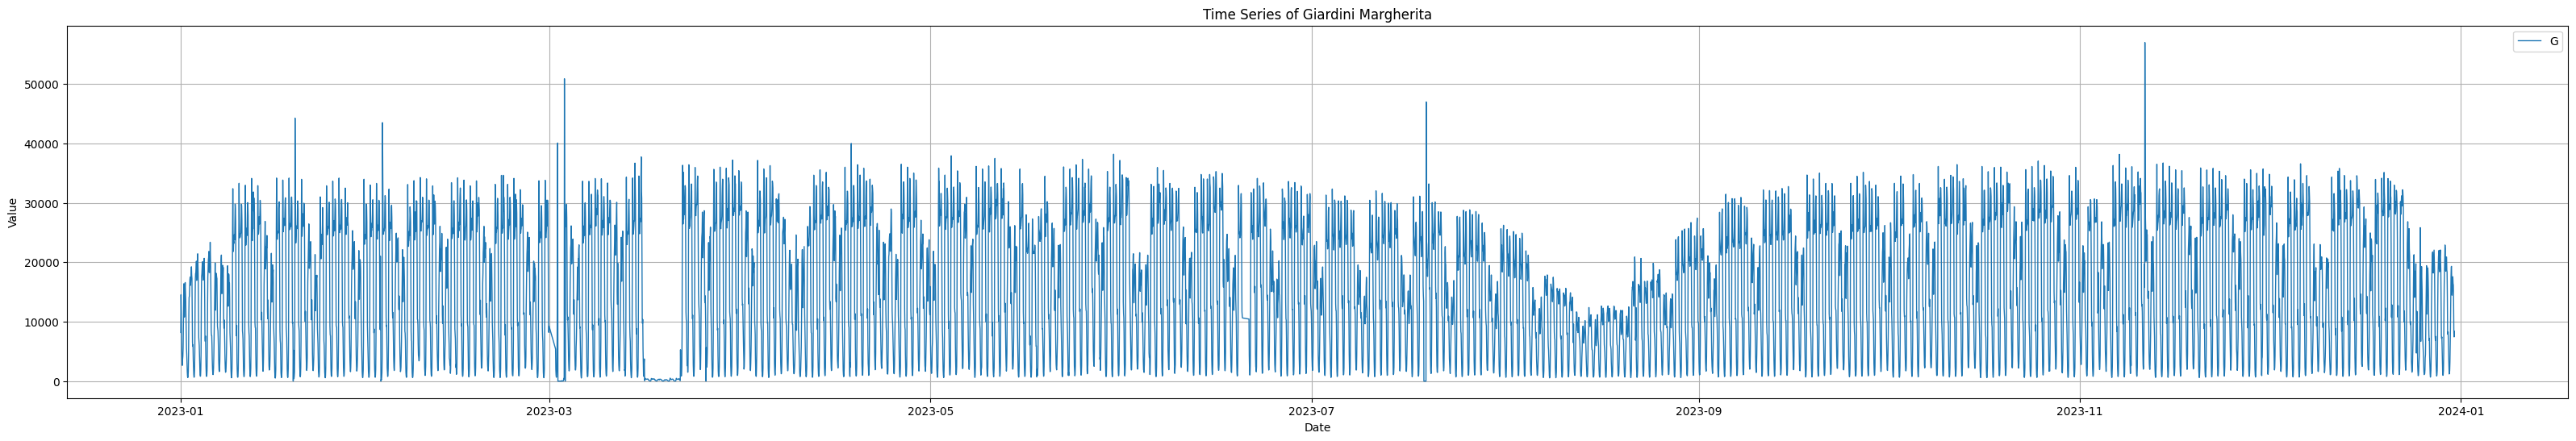

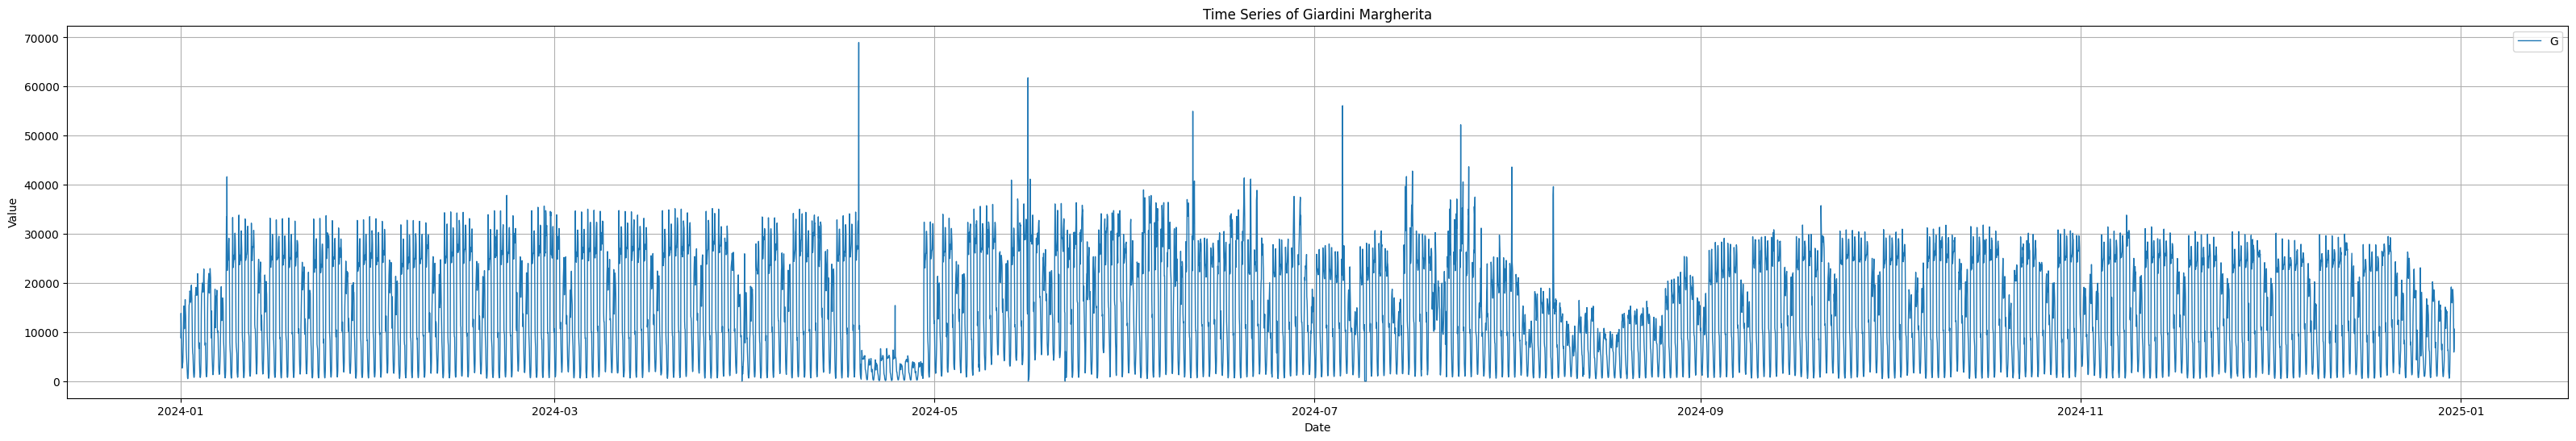

In [46]:
starting_date = datetime(2019,1,1)
ending_date = datetime(2019,12,31)
for starting_date, ending_date in zip([datetime(2019,1,1), datetime(2020,1,1), datetime(2021,1,1), datetime(2022,1,1), datetime(2023,1,1), datetime(2024,1,1)], [datetime(2019,12,31), datetime(2020,12,31), datetime(2021,12,31), datetime(2022,12,31), datetime(2023,12,31), datetime(2024,12,31)]):
    plot_time_series([df_melted],  'Value','Date', "Giardini", start_date=starting_date, end_date=ending_date,  max_rows=500000, title='Giardini Margherita')

Ogni tanto ci sono degli outlier della madonna. Ogni tanto sembra manchino dei valori, ma in realta se si zooma sullo specifico periodo ci sono, sono solo molte meno macchine. Come se alcune spire fossero state spente.

In [48]:
df_melted.shape

(52536, 2)

Update controllando meglio ci sono dei valori che mancano. Nell'altro notebook da gennaio 2019 a dicembre 24 ci sono 52608 entries e qui 52536 :|

In [53]:
df_melted.resample('1h', on='Date').mean().reset_index().ffill()

,Date,Value
0,2019-01-01 00:00:00,10501.0
1,2019-01-01 01:00:00,16863.0
2,2019-01-01 02:00:00,15248.0
3,2019-01-01 03:00:00,9844.0
4,2019-01-01 04:00:00,6202.0
...,...,...
52603,2024-12-31 19:00:00,16224.0
52604,2024-12-31 20:00:00,16488.0
52605,2024-12-31 21:00:00,6852.0
52606,2024-12-31 22:00:00,4162.0


Come trattiamo gli outlier???? :))))))))))))))))))))))))))9

In [54]:
df_melted.describe()

,Date,Value
count,52536,52536.000000
mean,2021-12-31 14:58:32.014618368,15161.876827
min,2019-01-01 00:00:00,0.000000
25%,2020-07-01 05:45:00,4644.750000
50%,2021-12-31 11:30:00,13841.000000
75%,2023-07-03 17:15:00,24944.000000
max,2024-12-31 23:00:00,168498.000000
std,NaN,11065.799219


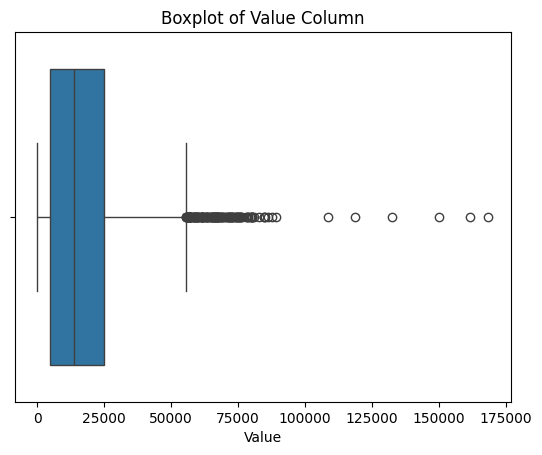

In [55]:
sns.boxplot(x=df_melted['Value'])
plt.title('Boxplot of Value Column')
plt.xlabel('Value')
plt.show()

boh l'idea migliore ora come ora mi sembra fregarsene

## Weather dataset

In [49]:
weather_folder = os.path.join(datasets_folder,'weather')

weather_df = merge_csv_to_dataframe(weather_folder)
weather_df

Merged 6 CSV files


,PragaTime,TAVG,PREC,RHAVG,RAD,W_SCAL_INT,W_VEC_DIR,W_VEC_INT,LEAFW,ET0
0,2021-01-01 00:00:00,4.7,0.3,87.0,0.0,1.8,322.3,1.8,1.0,0.0
1,2021-01-01 01:00:00,4.2,0.1,87.1,0.0,0.9,339.6,0.8,1.0,0.0
2,2021-01-01 02:00:00,4.3,0.0,88.1,0.0,0.5,249.0,0.5,1.0,0.0
3,2021-01-01 03:00:00,4.2,0.6,90.8,0.0,0.9,68.7,0.4,1.0,0.0
4,2021-01-01 04:00:00,4.1,0.1,90.4,0.0,1.2,160.4,0.9,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
52580,2023-12-31 19:00:00,13.4,0.0,69.2,0.0,6.2,207.2,6.0,0.0,0.0
52581,2023-12-31 20:00:00,8.6,0.0,92.9,0.0,5.6,277.4,5.5,0.0,0.0
52582,2023-12-31 21:00:00,8.8,0.6,96.5,0.0,2.6,240.3,2.5,1.0,0.0
52583,2023-12-31 22:00:00,12.2,0.2,85.9,0.0,5.9,218.4,5.8,1.0,0.0
